In [83]:
import pandas as pd
import os
from collections import defaultdict

def parse_timestamp(timestamp):
    parts = timestamp.split(":")
    if len(parts) == 3:
        return parts[1].strip()
    else:
        print("Error: timestamp without 3 parts")

def load_zsh_history(path):
    # Check if the file exists
    if not os.path.exists(path):
        print("File not found:", path)
        return None

    timestamps = []
    full_commands = []

    with open(path, 'r', errors='ignore') as file:
        errors = 0
        for line in file:
            parts = line.split(';', 1)  # Split each line at the first semicolon
            if len(parts) == 2:
                timestamps.append(parse_timestamp(parts[0]))
                full_command = parts[1].strip()
                full_commands.append(full_command)
            else:
                errors += 1
        print(f"Read file with {errors} error rows")

    max_num_sub_commands = 0
    for command in full_commands:
        max_num_sub_commands = max(max_num_sub_commands, len(command.split(" ")))

    sub_commands = defaultdict(list)
    for command in full_commands:
        parts = command.split(" ")
        num_columns_to_fill = max_num_sub_commands - len(parts)
        fill = [None] * num_columns_to_fill
        parts = parts + fill
        for i, part in enumerate(parts):
            sub_commands[f"command_{i}"].append(part)

    df = pd.DataFrame({
        'Timestamp': timestamps,
        'full_command': full_commands
    } | sub_commands)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
    df.dropna(subset=['Timestamp'], inplace=True)
    df.set_index('Timestamp', inplace=True)
    return df

# Path to your zsh_history file
history_path = os.path.expanduser('~/.zsh_history')

# Load the history into a DataFrame
df = load_zsh_history(history_path)

print(f"Number of rows: {len(df)}")


Read file with 28 error rows
Number of rows: 2857


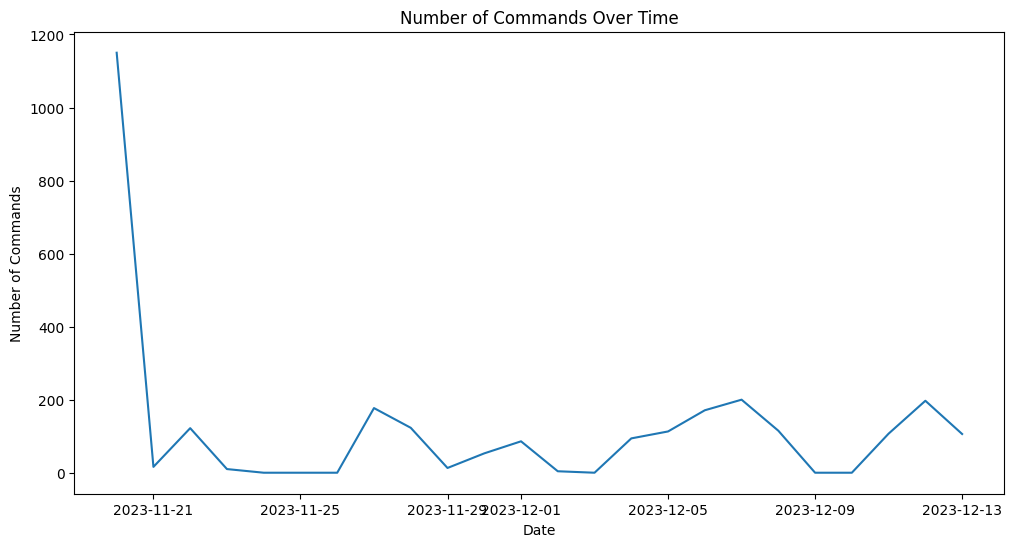

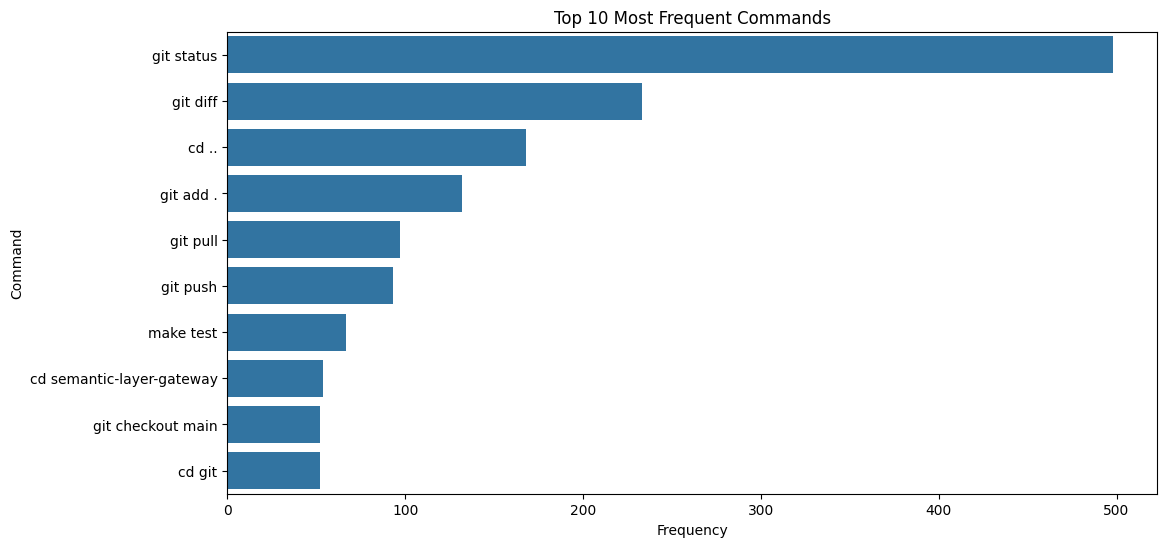

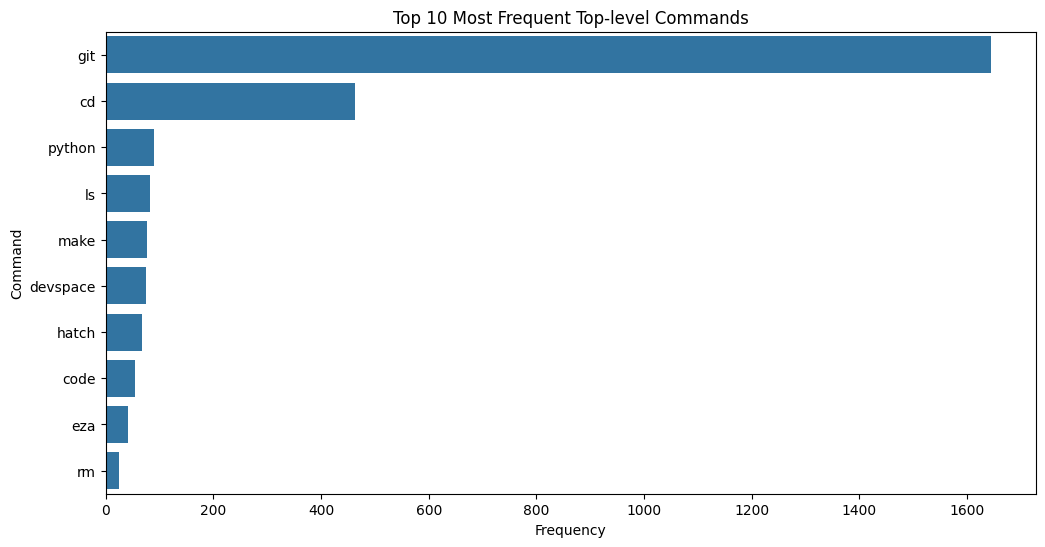

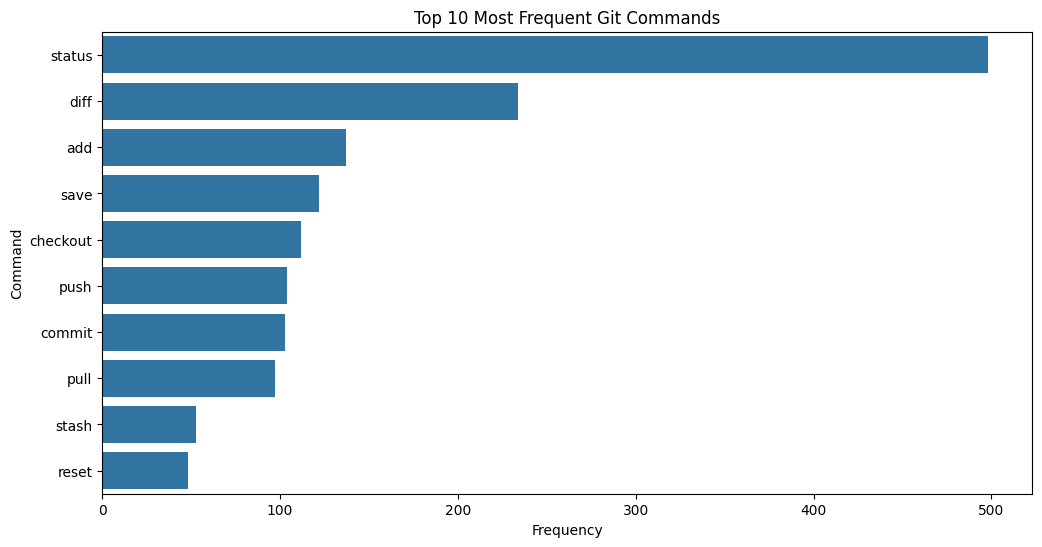

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Visualization 1: Commands over Time
# Resample to count commands per day (or another time period)
commands_per_day = df['full_command'].resample('D').count()

plt.figure(figsize=(12, 6))
sns.lineplot(data=commands_per_day)
plt.title('Number of Commands Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Commands')
plt.show()

# Visualization 2: Most Frequent Commands
# Count the frequency of each command
command_counts = df['full_command'].value_counts().head(10)  # Top 10 commands

plt.figure(figsize=(12, 6))
sns.barplot(x=command_counts.values, y=command_counts.index)
plt.title('Top 10 Most Frequent Commands')
plt.xlabel('Frequency')
plt.ylabel('Command')
plt.show()

# Visualization 3: Most Frequent Top-level Commands
# Count the frequency of each command
command_counts = df['command_0'].value_counts().head(10)  # Top 10 commands

plt.figure(figsize=(12, 6))
sns.barplot(x=command_counts.values, y=command_counts.index)
plt.title('Top 10 Most Frequent Top-level Commands')
plt.xlabel('Frequency')
plt.ylabel('Command')
plt.show()

# Visualization 4: Most Frequent Git Commands
# Count the frequency of each command
command_counts = df[df['command_0'] == "git"]['command_1'].value_counts().head(10)  # Top 10 commands

plt.figure(figsize=(12, 6))
sns.barplot(x=command_counts.values, y=command_counts.index)
plt.title('Top 10 Most Frequent Git Commands')
plt.xlabel('Frequency')
plt.ylabel('Command')
plt.show()
